# Project Title : Banking Management System

# Purpose 
  The main aim of Bank Management Mini DBMS project is to keep record of customer transactions in the bank.
  We aim to demonstrate the use of create, read, update and delete MySQL operations through this project.
  Firstly, employee registration is done in the concern bank branch.
  Branch employee creates customer account in the bank, then customer can credit amount, debit amount and check balance.
  Customer can even use different services like insurance, loan, bill payments etc.

# Step 0 :Downloading necessary packages


In [9]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

# Step 1 : Importing necessary packages

In [10]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

# Step 2 : Establishing Connection (Database connectivity from python to mysql database)

In [11]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'Rekha@777', host = 'localhost',
    database = 'bankingmanagemtntsystem'
)

# Step 3 : Data View

In [12]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'customerses' table
cursor.execute('select * from customerses')
#After fetching data from the database we are storing it into Pandas DataFrame
customerses_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(customerses_data.head())

   custid first_name  last_name         city    mobileno occupation  \
0  C00001       John        Doe     New York  1234567890   Engineer   
1  C00002       Jane        Doe  Los Angeles  1234567891     Doctor   
2  C00003        Jim       Beam      Chicago  1234567892    Teacher   
3  C00004       Jack    Daniels      Houston  1234567893     Lawyer   
4  C00005       Jill  Valentine      Phoenix  1234567894      Nurse   

  DateOfBirth  
0  1980-01-01  
1  1981-02-02  
2  1982-03-03  
3  1983-04-04  
4  1984-05-05  


In [13]:
# Query data from the 'branch' table
cursor.execute('select * from branch')
# Fetch the data from the cursor and store it into a Pandas DataFrame
branch_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(branch_data.head())

  branchid       branch_name        bcity
0    B0001   Central Library     New York
1    B0002  East Side Branch  Los Angeles
2    B0003  West Side Branch      Chicago
3    B0004  North End Branch      Houston
4    B0005  South End Branch      Phoenix


In [14]:
# Query data from the 'accs' table
cursor.execute('SELECT * FROM accs')
# Fetch the data from the cursor and store it into a Pandas DataFrame
accs_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(accs_data.head())

  acnumber  custid branchid  opening_balance         aod     atype   astatus
0   A00001  C00001    B0001             1000  2024-01-01   Savings    Active
1   A00002  C00002    B0002             1500  2024-01-02  Checking    Active
2   A00003  C00003    B0003             2000  2024-01-03   Savings  Inactive
3   A00004  C00004    B0004             2500  2024-01-04  Checking    Active
4   A00005  C00005    B0005             3000  2024-01-05   Savings  Inactive


In [15]:
# Query data from the 'trandetails' table
cursor.execute('SELECT * FROM trandetails')
# Fetch the data from the cursor and store it into a Pandas DataFrame
trandetails_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(trandetails_data.head())

  tnumber acnumber         dot medium_of_transaction transaction_type  \
0  T00001   A00001  2024-01-01                Online          Deposit   
1  T00002   A00002  2024-01-02                   ATM       Withdrawal   
2  T00003   A00003  2024-01-03                Online          Deposit   
3  T00004   A00004  2024-01-04                Branch       Withdrawal   
4  T00005   A00005  2024-01-05                Online          Deposit   

   transaction_amount  
0                1000  
1                2000  
2                1500  
3                2500  
4                1200  


In [16]:
# Query data from the 'loan' table
cursor.execute('SELECT * FROM loan')
# Fetch the data from the cursor and store it into a Pandas DataFrame
loan_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(loan_data.head())

   custid branchid  loan_amount
0  C00001    B0001        50000
1  C00002    B0002        60000
2  C00003    B0003        70000
3  C00004    B0004        30000
4  C00005    B0005       100000


# Step 4 : Data Cleaning

In [17]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("customerses \n----------")
print(customerses_data.isnull().sum())
print("\nbranch \n----------")
print(branch_data.isnull().sum())
print("\naccs\n----------")
print(accs_data.isnull().sum())
print("\ntrandeatails\n----------")
print(trandetails_data.isnull().sum())
print("\nloan\n----------")
print(loan_data.isnull().sum())

customerses 
----------
custid         0
first_name     0
last_name      0
city           0
mobileno       0
occupation     0
DateOfBirth    0
dtype: int64

branch 
----------
branchid       0
branch_name    0
bcity          0
dtype: int64

accs
----------
acnumber           0
custid             0
branchid           0
opening_balance    0
aod                0
atype              0
astatus            0
dtype: int64

trandeatails
----------
tnumber                  0
acnumber                 0
dot                      0
medium_of_transaction    0
transaction_type         0
transaction_amount       0
dtype: int64

loan
----------
custid         0
branchid       0
loan_amount    0
dtype: int64


In [18]:
# Drop rows with any missing values (NaN) from the dataframe
customerses_data.dropna(inplace=True)
branch_data.dropna(inplace=True)
accs_data.dropna(inplace=True)
trandetails_data.dropna(inplace=True)
loan_data.dropna(inplace=True)

# Step 4 : Query Execution

In [19]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect (
    user = 'root', password = 'Rekha@777', host = 'localhost',
    database = 'bankingmanagemtntsystem'
)
# Create a cursor object
cursor = connection.cursor()

# Execute SQL query to join data from multiple tables (restaurant, reservation, and orders)
cursor.execute('SELECT loan.custid, loan.branchid, loan_amount FROM loan loan LEFT JOIN customerses cus ON loan.custid = cus.custid LEFT JOIN accs a ON a.branchid= loan.branchid')

# Fetch the data and store it into a Pandas DataFrame
union_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
union_data = pd.DataFrame(union_data)
# Print the grouped and aggregated data
print(union_data)

    custid branchid  loan_amount
0   C00001    B0001        50000
1   C00002    B0002        60000
2   C00003    B0003        70000
3   C00004    B0004        30000
4   C00005    B0005       100000
..     ...      ...          ...
95  C00096    B0096         5000
96  C00097    B0097        68000
97  C00098    B0098       260000
98  C00099    B0099        15000
99  C00100    B0100        80000

[100 rows x 3 columns]


In [20]:
# Print the number of duplicate rows in the DataFrame
print(customerses_data.duplicated().sum())
print(branch_data.duplicated().sum())
print(accs_data.duplicated().sum())
print(trandetails_data.duplicated().sum())
print(loan_data.duplicated().sum())

0
0
0
0
0


In [21]:
# Count the number of events
count_of_transactions = trandetails_data['transaction_amount'].value_counts()

# Print the number of transactions for each user
print(count_of_transactions)

transaction_amount
1000    3
1500    3
2500    3
1200    3
1300    3
       ..
4200    1
2900    1
50      1
4400    1
6200    1
Name: count, Length: 66, dtype: int64


In [22]:
#arrabge the balance in ascending order
customerses_data.sort_values(by='mobileno', ascending=True)    
 

,custid,first_name,last_name,city,mobileno,occupation,DateOfBirth
10,C00011,Barry,Burton,Austin,1234567800,Engineer,1990-11-11
11,C00012,Rebecca,Chambers,Jacksonville,1234567801,Doctor,1991-12-12
12,C00013,Sherry,Birkin,Fort Worth,1234567802,Scientist,1992-01-13
13,C00014,Carlos,Oliveira,Columbus,1234567803,Soldier,1993-02-14
14,C00015,Hunk,Unknown,Charlotte,1234567804,Agent,1994-03-15
...,...,...,...,...,...,...,...
5,C00006,Chris,Redfield,Philadelphia,1234567895,Firefighter,1985-06-06
6,C00007,Claire,Redfield,San Antonio,1234567896,Scientist,1986-07-07
7,C00008,Leon,Kennedy,San Diego,1234567897,Policeman,1987-08-08
8,C00009,Ada,Wong,Dallas,1234567898,Agent,1988-09-09


In [23]:
#arrange the transaction date in ascending order
accs_data.sort_values(by='acnumber', ascending=True)

,acnumber,custid,branchid,opening_balance,aod,atype,astatus
0,A00001,C00001,B0001,1000,2024-01-01,Savings,Active
1,A00002,C00002,B0002,1500,2024-01-02,Checking,Active
2,A00003,C00003,B0003,2000,2024-01-03,Savings,Inactive
3,A00004,C00004,B0004,2500,2024-01-04,Checking,Active
4,A00005,C00005,B0005,3000,2024-01-05,Savings,Inactive
...,...,...,...,...,...,...,...
95,A00096,C00096,B0096,48500,2024-04-05,Checking,Active
96,A00097,C00097,B0097,49000,2024-04-06,Savings,Inactive
97,A00098,C00098,B0098,49500,2024-04-07,Checking,Active
98,A00099,C00099,B0099,50000,2024-04-08,Savings,Inactive


# Data Visualization

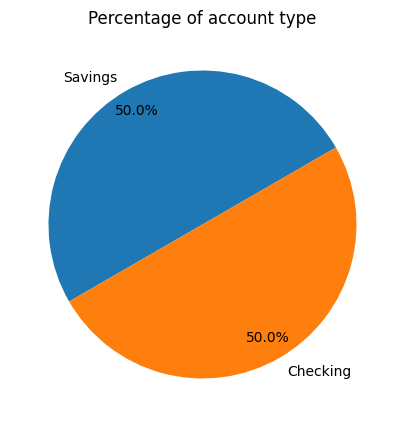

In [24]:
# Pie chart for percentage of accs by alert status
atype = accs_data['atype'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,5))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(atype.values, labels=atype.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('Percentage of account type')  # Set the title of the chart
# Display the chart
plt.show()

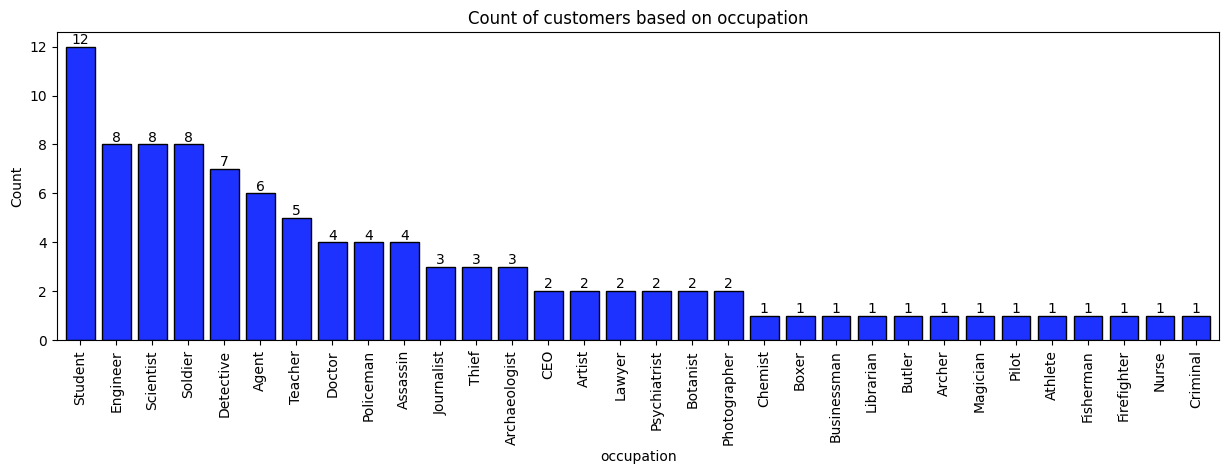

In [25]:
# Create a new figure with a specific size (width=10, height=4)
plt.figure(figsize=(15, 4))

# Create a bar plot showing the count of fraudalerts based on alert types
ax = customerses_data['occupation'].value_counts().plot(kind='bar',color='#1D32FF',fontsize=10,edgecolor='black',width=0.8)

# Set the x-axis label
plt.xlabel('occupation')
# Set the y-axis label
plt.ylabel('Count')
# Set the title of the plot
plt.title('Count of customers based on occupation')

# Add text labels to each bar indicating its count
for i, count in enumerate(customerses_data['occupation'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

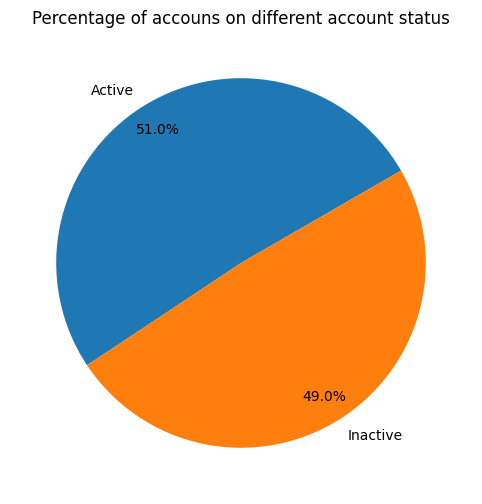

In [26]:
# Pie chart for percentage of accs alerts on different alert types
astatus = accs_data['astatus'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,6))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(astatus.values, labels=astatus.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85)
plt.title('Percentage of accouns on different account status')  # Set the title of the chart
# Display the chart
plt.show() 

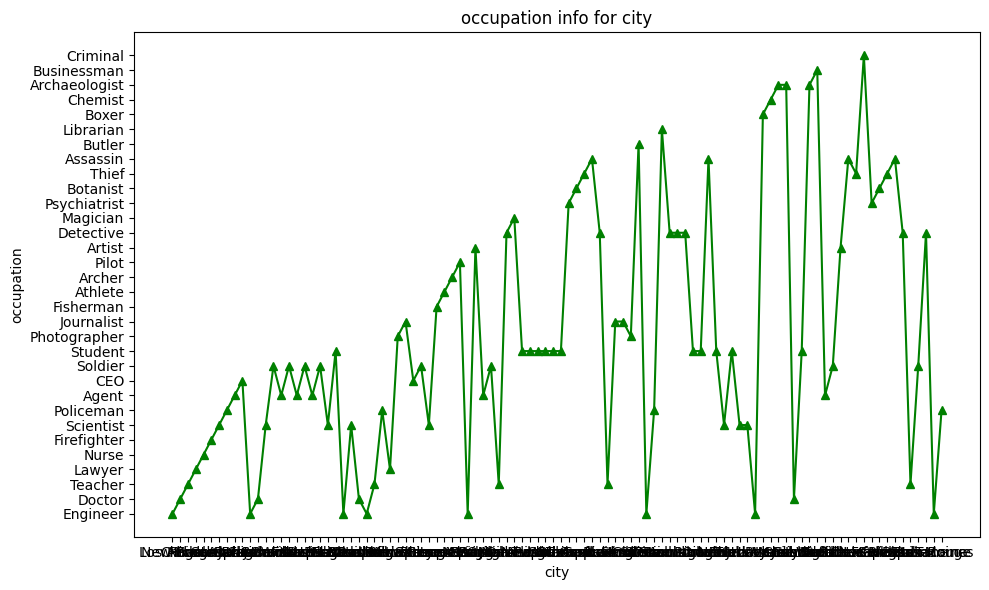

In [27]:
# create an line chart for customerses data based on balance
plt.figure(figsize=(10, 6))
plt.plot(customerses_data['city'], customerses_data['occupation'], marker='^', linestyle='-', color='green')
plt.xlabel('city')
plt.ylabel('occupation')
plt.title('occupation info for city')
plt.tight_layout()

# Show the plot
plt.show()

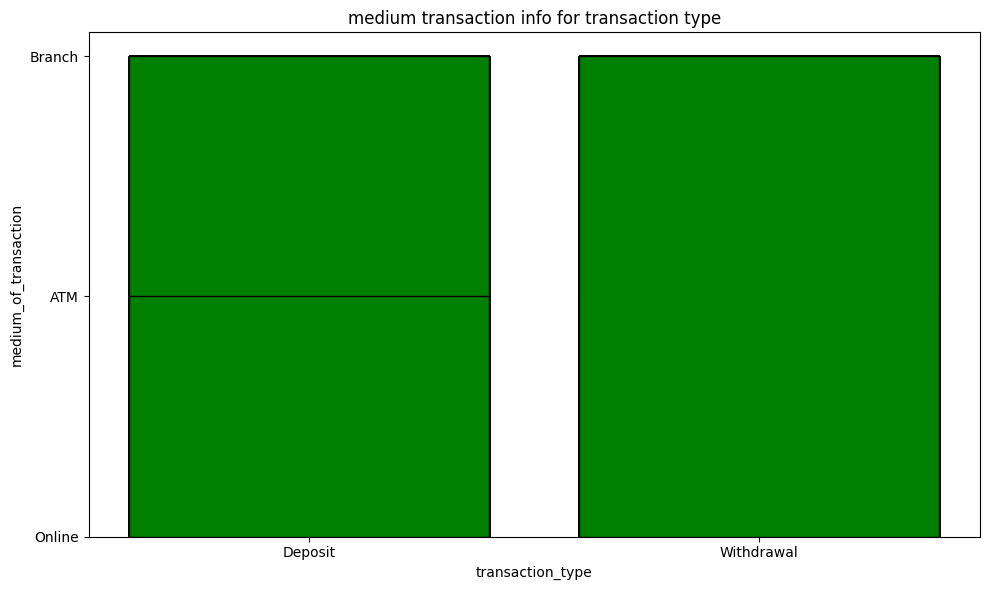

In [36]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(trandetails_data['transaction_type'], trandetails_data['medium_of_transaction'], color='green',edgecolor='black',width=0.8)
plt.xlabel('transaction_type')
plt.ylabel('medium_of_transaction')
plt.title('medium transaction info for transaction type')
plt.tight_layout()

# Show the plot
plt.show()

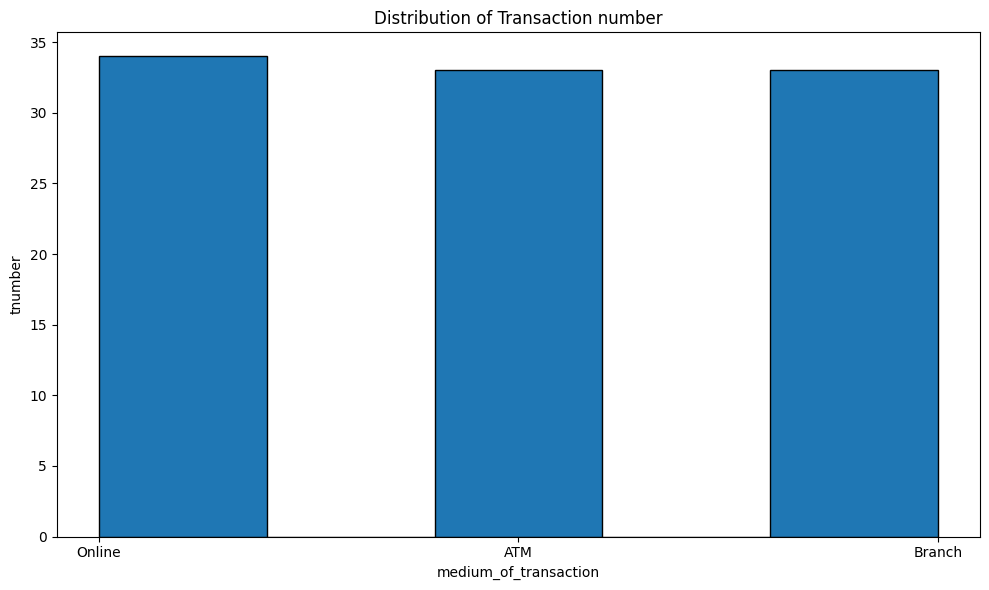

In [82]:
# Create a histogram for the transaction amount column
plt.figure(figsize=(10, 6))
plt.hist(trandetails_data['medium_of_transaction'], bins=5, edgecolor='black')
plt.xlabel('medium_of_transaction')
plt.ylabel('tnumber')
plt.title('Distribution of Transaction number')
plt.tight_layout()

# Show the plot
plt.show()

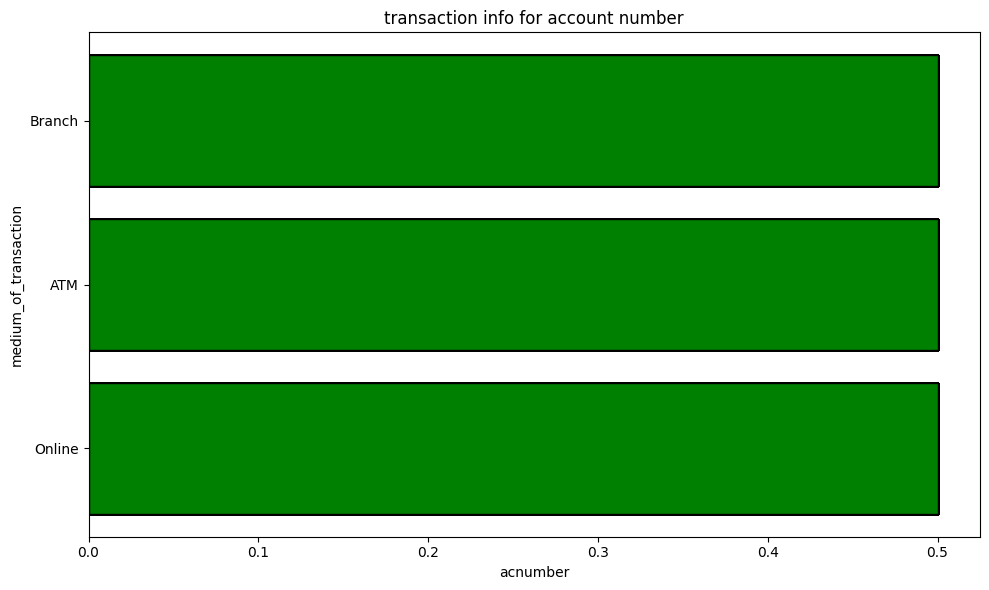

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(trandetails_data['medium_of_transaction'], color='green',edgecolor='black',width=0.5)
plt.xlabel('acnumber')
plt.ylabel('medium_of_transaction')
plt.title('transaction info for account number')
plt.tight_layout()

# Show the plot
plt.show()

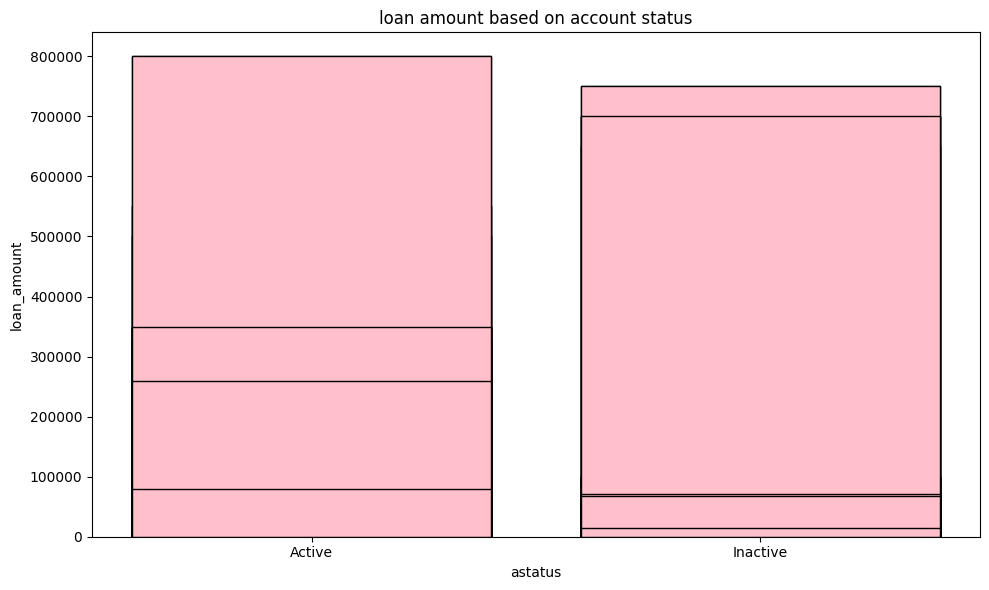

In [39]:
# create an line chart for accounts data based on balance
plt.figure(figsize=(10, 6))
plt.bar(accs_data['astatus'], loan_data['loan_amount'], color='pink',edgecolor='black',width=0.8)
plt.xlabel('astatus')
plt.ylabel('loan_amount')
plt.title('loan amount based on account status')
plt.tight_layout()

# Show the plot
plt.show()

# conclusion

bank management systems are essential software systems for financial institutions to manage their
operations effectively. The system provides various functionalities, including customer management, account
management, transaction management, and reporting. Financial institutions need to consider various factors
when selecting a bank management system, including security, scalability, flexibility, and cost- effectiveness.
The adoption of a bank management system can provide several benefits to financial institutions, including
increased efficiency, better customer service, and improved reporting, leading to long-term success and
sustainability.
bank management systems play a vital role in the success and sustainability of financial
institutions,By providing a comprehensive study of bank management systems.